In [2]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import xlrd
import datetime
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url="https://www1.nyc.gov/site/nypd/stats/crime-statistics/borough-and-precinct-crime-stats.page"
soup = BeautifulSoup(requests.get(url).content, "html.parser")
link2="https://www1.nyc.gov/assets/nypd/downloads/excel/crime_statistics/"
alldf=pd.DataFrame()
df=pd.DataFrame()
ting=pd.DataFrame()
#looped it
for link in soup.findAll('a', attrs={'href': re.compile("pct.xlsx")}):
    a=link.get('href')
    temporary=link2+a[a.find("cs-en"):]
    df=pd.read_excel(temporary, skiprows=12, nrows=17)
    ting=ting.append(pd.read_excel(temporary, sort=False, skiprows=33,nrows=9))
    week = str(pd.read_excel(temporary, usecols = "C", skiprows = 8, nrows = 1)).split()[4:7]
    df['week'] = " ".join(week)#day of the week
    df=df.set_index('week')
    precinct = str(pd.read_excel(temporary, usecols = "M", skiprows = 7, nrows = 1, header = None)).split()[2]
    if(list(precinct)[0].isdigit()==True):
        precinct=re.findall('[0-9]+', precinct)[0]#precinct number
    df['precinct']=precinct
    alldf=alldf.append(df, sort=False)
print(alldf)

                                  Unnamed: 0  Unnamed: 1  2021  2020    % Chg  \
week                                                                            
1/4/2021 Through 1/10/2021            Murder         NaN     1     0    ***.*   
1/4/2021 Through 1/10/2021              Rape         NaN     0     0    ***.*   
1/4/2021 Through 1/10/2021           Robbery         NaN     3     8    -62.5   
1/4/2021 Through 1/10/2021      Fel. Assault         NaN     8    17 -52.9412   
1/4/2021 Through 1/10/2021          Burglary         NaN     1     4      -75   
...                                      ...         ...   ...   ...      ...   
1/4/2021 Through 1/10/2021         UCR Rape*         NaN     0     0    ***.*   
1/4/2021 Through 1/10/2021  Other Sex Crimes         NaN     0     0    ***.*   
1/4/2021 Through 1/10/2021     Shooting Vic.         NaN     0     0    ***.*   
1/4/2021 Through 1/10/2021     Shooting Inc.         NaN     0     0    ***.*   
1/4/2021 Through 1/10/2021  

In [4]:
alldf.to_csv('test.csv', index=True)
ting.to_csv('test1.csv', index=False)

In [5]:
unwanted_Cols =['Unnamed: 1']
alldf.drop(columns=unwanted_Cols, inplace=True)

In [6]:
rcols={'Unnamed: 0': 'Crime Type', 2020: 'Week to Date 2020', 2019: 'Week to Date 2019','% Chg':'Week to Date %Chg', 
       '2020.1': '28 day 2020', '2019.1':'28 day 2019','% Chg.1':'28 day %Chg',
       '2020.2': 'Year to Date 2020', '2019.2':'Year to Date 2019', '% Chg.2': 'Year to Date % Chg', '% Chg.3': '2Yr %Chg', 
       '% Chg.4': '10Yr %Chg','% Chg.5': '27Yr %Chg'}

In [7]:
alldf.rename(columns=rcols, inplace=True)

In [8]:
#print(alldf)
alldf.to_csv('test.csv', index=True)

In [19]:
#top 5precincts with the most crime and the crime type for a particular week
thing1=alldf
thing1 = thing1[['Crime Type', 'Week to Date 2020', 'precinct']]
cols = list(thing1['Crime Type'].unique())
top5precinct = pd.pivot_table(thing1, values='Week to Date 2020', index=['precinct'],
                    columns=['Crime Type'])
unwanted_Cols =['TOTAL']
top5precinct.drop(columns=unwanted_Cols, inplace=True)
top5precinct['top5CrimeByPrecWTD'] = top5precinct.max(axis=1)
top5precinct['Max'] = top5precinct.idxmax(axis=1)
top5precinct=top5precinct[['top5CrimeByPrecWTD', 'Max']].sort_values(by=['top5CrimeByPrecWTD'], ascending=False)
top5precinct.to_csv('MostCrimeinEachPrecinct.csv', index=True)

In [10]:
1. Top 5 crime types in entire nyc for a particular week/year to date/last ten years
2. Q1 for each precinct/year to date/last ten years
3. Q1 by borough-create dictionary
4. Within each borough, top two precinct with highest number of crime
5. Which crime type has highest Change percentage within each borough


SyntaxError: invalid syntax (<ipython-input-10-de9790a1b354>, line 1)

In [ ]:
#top 5precincts with the most crime and the crime type for year to date

thing2=alldf
thing2 = thing2[['Crime Type', 'Year to Date 2020', 'precinct']]
cols = list(thing2['Crime Type'].unique())
top5precinctYear = pd.pivot_table(thing2, values='Year to Date 2020', index=['precinct'],
                    columns=['Crime Type'])
unwanted_Cols =['TOTAL']
top5precinctYear.drop(columns=unwanted_Cols, inplace=True)
top5precinctYear['top5CrimeByPrec_YTD'] = top5precinctYear.max(axis=1)
top5precinctYear['Max'] = top5precinctYear.idxmax(axis=1)
top5precinctYear[['top5CrimeByPrec_YTD', 'Max']].sort_values(by=['top5CrimeByPrec_YTD'], ascending=False).head(5)
top5precinctYear.columns

<AxesSubplot:xlabel='precinct'>

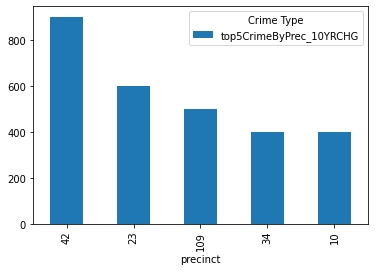

In [11]:
#top 5precincts with the most crime and the crime type for 10 yr percent change

thing3=alldf
thing3 = thing3[['Crime Type', '10Yr %Chg', 'precinct']]
thing3=thing3.replace(to_replace ="***.*", 
                 value =0.0)
cols = list(thing3['Crime Type'].unique())
top5CrimeByPrec_10YRCHG = pd.pivot_table(thing3, values='10Yr %Chg', index=['precinct'],
                    columns=['Crime Type'])
unwanted_Cols =['TOTAL']
top5CrimeByPrec_10YRCHG.drop(columns=unwanted_Cols, inplace=True)
top5CrimeByPrec_10YRCHG['top5CrimeByPrec_10YRCHG'] = top5CrimeByPrec_10YRCHG.max(axis=1)
top5CrimeByPrec_10YRCHG['Max'] = top5CrimeByPrec_10YRCHG.idxmax(axis=1)
top5CrimeByPrec_10YRCHG[['top5CrimeByPrec_10YRCHG', 'Max']].sort_values(by=['top5CrimeByPrec_10YRCHG'], ascending=False).head(5).plot.bar()

In [12]:
#top 5 crimes in each precinct for a particular week to date
thing4=alldf
thing4 = thing4[['Crime Type', 'Week to Date 2020', 'precinct']]
thing4.to_csv('test4.csv', index=True)
for thingy in range(len(thing4)):
    if(thingy%17==0):
        print(thing4.iloc[thingy:thingy+17].sort_values(by='Week to Date 2020', ascending=False).head(5))

                               Crime Type  Week to Date 2020 precinct
week                                                                 
1/4/2021 Through 1/10/2021          TOTAL                 39       40
1/4/2021 Through 1/10/2021  Petit Larceny                 39       40
1/4/2021 Through 1/10/2021  Misd. Assault                 25       40
1/4/2021 Through 1/10/2021   Fel. Assault                 17       40
1/4/2021 Through 1/10/2021        Robbery                  8       40
                               Crime Type  Week to Date 2020 precinct
week                                                                 
1/4/2021 Through 1/10/2021          TOTAL                 14       41
1/4/2021 Through 1/10/2021  Petit Larceny                 10       41
1/4/2021 Through 1/10/2021  Misd. Assault                  7       41
1/4/2021 Through 1/10/2021    Gr. Larceny                  5       41
1/4/2021 Through 1/10/2021         G.L.A.                  4       41
                    

In [13]:
#top 5 crimes in each precinct for year to Date
thing5=alldf
thing5 = thing5[['Crime Type', 'Year to Date 2020', 'precinct']]
thing5.to_csv('test4.csv', index=True)
for thingy in range(len(thing5)):
    if(thingy%17==0):
        print(thing5.iloc[thingy:thingy+17].sort_values(by='Year to Date 2020', ascending=False).head(5))

                               Crime Type  Year to Date 2020 precinct
week                                                                 
1/4/2021 Through 1/10/2021          TOTAL                 56       40
1/4/2021 Through 1/10/2021  Petit Larceny                 48       40
1/4/2021 Through 1/10/2021  Misd. Assault                 33       40
1/4/2021 Through 1/10/2021   Fel. Assault                 25       40
1/4/2021 Through 1/10/2021        Robbery                  9       40
                               Crime Type  Year to Date 2020 precinct
week                                                                 
1/4/2021 Through 1/10/2021          TOTAL                 21       41
1/4/2021 Through 1/10/2021  Petit Larceny                 16       41
1/4/2021 Through 1/10/2021  Misd. Assault                 11       41
1/4/2021 Through 1/10/2021    Gr. Larceny                  7       41
1/4/2021 Through 1/10/2021        Robbery                  4       41
                    

In [14]:
#top 5 crime 10YR% Change in each precinct 
thing6=alldf
thing6 = thing6[['Crime Type', '10Yr %Chg', 'precinct']]
thing6=thing6.replace(to_replace ="***.*", 
                 value =0.0)
thing6.to_csv('test4.csv', index=True)
for thingy in range(len(thing6)):
    if(thingy%17==0):
        print(thing6.iloc[thingy:thingy+17].sort_values(by='10Yr %Chg', ascending=False).head(5))

                              Crime Type   10Yr %Chg precinct
week                                                         
1/4/2021 Through 1/10/2021  Fel. Assault  160.000000       40
1/4/2021 Through 1/10/2021        G.L.A.   66.666667       40
1/4/2021 Through 1/10/2021   Gr. Larceny   60.000000       40
1/4/2021 Through 1/10/2021       Housing   60.000000       40
1/4/2021 Through 1/10/2021         TOTAL   32.352941       40
                                  Crime Type  10Yr %Chg precinct
week                                                            
1/4/2021 Through 1/10/2021            Murder        0.0       41
1/4/2021 Through 1/10/2021              Rape        0.0       41
1/4/2021 Through 1/10/2021     Shooting Inc.        0.0       41
1/4/2021 Through 1/10/2021     Shooting Vic.        0.0       41
1/4/2021 Through 1/10/2021  Other Sex Crimes        0.0       41
                               Crime Type   10Yr %Chg precinct
week                                            

In [15]:
thisdict = {'40':"Bronx",'41':"Bronx",'42':"Bronx",'43':"Bronx",'44':"Bronx",'45':"Bronx",'46':"Bronx",'47':"Bronx",'48':"Bronx",'49':"Bronx",'50':"Bronx",'52':"Bronx",
  '60':"PB Brooklyn South",'61':"PB Brooklyn South",'62':"PB Brooklyn South",'63':"PB Brooklyn South",'66':"PB Brooklyn South",'67':"PB Brooklyn South",'68':"PB Brooklyn South",'69':"PB Brooklyn South",'70':"PB Brooklyn South",'71':"PB Brooklyn South",'72':"PB Brooklyn South",'76':"PB Brooklyn South",'78':"PB Brooklyn South",
  '73': "PB Brooklyn North",'75': "PB Brooklyn North",'77': "PB Brooklyn North",'79': "PB Brooklyn North",'81': "PB Brooklyn North",'83': "PB Brooklyn North",'84': "PB Brooklyn North",'88': "PB Brooklyn North",'90': "PB Brooklyn North",'94': "PB Brooklyn North",
  '1':"PB Manhattan South",'5':"PB Manhattan South",'6':"PB Manhattan South",'7':"PB Manhattan South",'9':"PB Manhattan South",'10':"PB Manhattan South",'13':"PB Manhattan South",'Midtown':"PB Manhattan South", '17':"PB Manhattan South", 'Midtown':"PB Manhattan South",
  '19':"PB Manhattan North",'20':"PB Manhattan North", 'Central':"PB Manhattan North", '23':"PB Manhattan North",'24':"PB Manhattan North",'25':"PB Manhattan North",'26':"PB Manhattan North",'28':"PB Manhattan North",'30':"PB Manhattan North",'32':"PB Manhattan North",'33':"PB Manhattan North",'34':"PB Manhattan North",
  '100':"PB Queens South",'101':"PB Queens South",'102':"PB Queens South",'103':"PB Queens South",'105':"PB Queens South",'106':"PB Queens South",'107':"PB Queens South",'113':"PB Queens South",
  '104':"PB Queens North",'108':"PB Queens North",'109':"PB Queens North",'110':"PB Queens North",'111':"PB Queens North",'112':"PB Queens North",'114':"PB Queens North",'115':"PB Queens North",
  '120':"PB Staten Island",'121':"PB Staten Island",'122':"PB Staten Island",'123':"PB Staten Island"}

In [16]:
#4. Within each borough, top two precinct with highest number of crime

thing7=alldf
top5precinctYear = pd.pivot_table(thing7, values='Week to Date 2020', index=['precinct'],
                    columns=['Crime Type'])
unwanted_Cols =['TOTAL']
top5precinctYear.drop(columns=unwanted_Cols, inplace=True)
top5precinctYear['top5CrimeByPrec_YTD'] = top5precinctYear.max(axis=1)
top5precinctYear['Max'] = top5precinctYear.idxmax(axis=1)
top5precinctYear[['top5CrimeByPrec_YTD', 'Max']].sort_values(by=['top5CrimeByPrec_YTD'], ascending=False).head(5)
top5precinctYear["Borough"] = top5precinctYear.index.to_series().apply(lambda x: thisdict[x])
top5precinctYear= top5precinctYear[['top5CrimeByPrec_YTD', 'Max', 'Borough']].sort_values(by=['Borough','top5CrimeByPrec_YTD'], ascending=False)

grouped_df = top5precinctYear.groupby("Borough")
top_n_rows = grouped_df.head(2)
top_n_rows=top_n_rows.sort_values('top5CrimeByPrec_YTD', ascending=False)
len(top_n_rows)

16

<AxesSubplot:xlabel='precinct'>

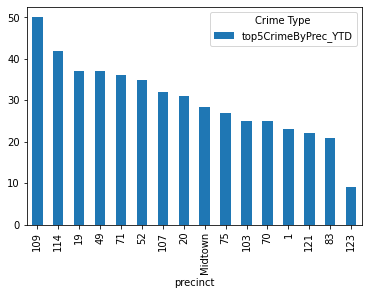

In [23]:
top_n_rows.plot.bar()

In [20]:
#find high risk and low risk crimes and plot on same chart
#build a front end page that visualizes a map in html
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]--><!--[if IE 7]><html class="no-js lt-ie9 lt-ie8 ie7"><![endif]--><!--[if IE 8]><html class="no-js lt-ie9"><![endif]--><!--[if gt IE 8]><!--><html class="no-js"><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Borough and Precinct Crime Stats - NYPD</title><!--
					ls:begin[stylesheet]
				--><link href="/iwov-resources/fixed-layout/3-Row Simple.css" rel="stylesheet" type="text/css"/><!--
					ls:end[stylesheet]
				--><!--
					ls:begin[meta-keywords]
				--><meta content="" name="keywords"/><!--
					ls:end[meta-keywords]
				--><!--
					ls:begin[meta-description]
				--><meta content="" name="description"/><!--
					ls:end[meta-description]
				--><!--
					ls:begin[meta-vpath]
				--><meta content="" name="vpath"/><!--
					ls:end[meta-vpath]
				--><!--
					ls:begin[meta-page-locale-name]
				--><meta content="" name="page-locale-name"/><!--
					